### Installing the packages that we could be using

In [90]:
! pip install beautifulsoup4
! pip install lxml
! pip install html5lib
! pip install requests

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: Cryptograp

### Importing libraries

In [91]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

### Calling the URL and creating a Soup object

In [92]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')

print(soup)

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of postal codes of Canada: M - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"2906d08c-df53-4722-b79c-5ed898ff5ccb","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":1013111980,"wgRevisionId":1013111980,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata","Wikipedia semi-protected p

### Scraping the data from the website

In [93]:
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

# print(table_contents)
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

### Viewing the 30 first data of the table

In [94]:
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


### Looking the amount of data present in the table - 103 rows

In [95]:
df.shape

(103, 3)

### Obtaining the data of latitude and longitude from the CSV file

##### I tried to get the data using geocoder but it doesn't works... I'll try later

In [96]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_a2142a9f47934416bc895ca3b5989da8 = 'https://s3-api.us-geo.objectstorage.softlayer.net'
else:
    endpoint_a2142a9f47934416bc895ca3b5989da8 = 'https://s3-api.us-geo.objectstorage.service.networklayer.com'

client_a2142a9f47934416bc895ca3b5989da8 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='UGGQhcTb11Bfm2vAA29Krt5ly7EVX0tPFQyY_7pPCo8-',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_a2142a9f47934416bc895ca3b5989da8)

body = client_a2142a9f47934416bc895ca3b5989da8.get_object(Bucket='segmentingandclusteringneighborho-donotdelete-pr-c0hieebkmhk2sl',Key='Geospatial_Coordinates.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### Loop for append columns of latitude and longitude to the final dataframe

In [97]:
i = 0
for postalcode1 in df_data_1['Postal Code']:
    j = 0 
    for postalcode2 in df['PostalCode']:
        if postalcode1 == postalcode2:
            df.loc[j, "Latitude"] = df_data_1.loc[i, 'Latitude']
            df.loc[j, "Longitude"] = df_data_1.loc[i, 'Longitude']
        j +=1
    i +=1

### Reviewing if the final table is correct

In [98]:
df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


### Selecting the data that has the word "Toronto" in Borough

In [99]:
df_Toronto = df
i = 0
for borough in df_Toronto['Borough']:
    if borough.count('Toronto') >= 1:
        df_Toronto.loc[i, 'Borough'] = df_Toronto.loc[i, 'Borough']
        
    else:
        #df_Toronto.drop(i, axis=0)
        df_Toronto.loc[i, 'Borough'] = 0
    i +=1
    
df_Toronto = df_Toronto.drop(df[df['Borough']==0].index)
df_Toronto = df_Toronto.reset_index()
del df_Toronto['index']
df_Toronto.head(30)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
3,M4E,East Toronto,The Beaches,43.676357,-79.293031
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564
7,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
8,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259
9,M4J,East York/East Toronto,The Danforth East,43.685347,-79.338106


### Checking the amount of data of Toronto Neighborhoods that we will use

In [100]:
df_Toronto.shape

(39, 5)

### Importing geopy - if you have not installed this library uncomment the fist line of the block

In [101]:
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

### Using Geocode to obtain the latitude and longitude of Toronto

In [102]:
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location_T = geolocator.geocode(address)
latitude_T = location_T.latitude
longitude_T = location_T.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude_T, longitude_T))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


### Installing folium for use the map option

In [103]:
! pip install folium

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


### Placing the points of the Toronto Dataframe on the map

In [104]:
import folium

# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude_T, longitude_T], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_Toronto['Latitude'], df_Toronto['Longitude'], df_Toronto['Borough'], df_Toronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Writting the user parameters of Foursquare API

In [105]:
CLIENT_ID = 'HZZEUCTUKL1Q4UP43BHUWEH5SJTWKIU1DPYNKYOUSQB440FL' # your Foursquare ID
CLIENT_SECRET = 'S5LYCTMRRHYZAXBKYOYY5TW2LUBE0RKSXARQW4BIDH4JYZWD' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HZZEUCTUKL1Q4UP43BHUWEH5SJTWKIU1DPYNKYOUSQB440FL
CLIENT_SECRET:S5LYCTMRRHYZAXBKYOYY5TW2LUBE0RKSXARQW4BIDH4JYZWD


In [106]:
neighborhood_latitude = df_Toronto.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_Toronto.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_Toronto.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Regent Park, Harbourfront are 43.6542599, -79.3606359.


#### Now, let's get the top 100 venues that are in Regent Park and Harbourfront within a radius of 500 meters.

In [107]:
# type your answer here
#<!-- The correct answer is
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

#<!--
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=HZZEUCTUKL1Q4UP43BHUWEH5SJTWKIU1DPYNKYOUSQB440FL&client_secret=S5LYCTMRRHYZAXBKYOYY5TW2LUBE0RKSXARQW4BIDH4JYZWD&v=20180605&ll=43.6542599,-79.3606359&radius=500&limit=100'

In [108]:
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

### Send the GET request and examine the resutls

In [109]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60708e5775375111a119cf38'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Corktown',
  'headerFullLocation': 'Corktown, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 44,
  'suggestedBounds': {'ne': {'lat': 43.6587599045, 'lng': -79.3544279001486},
   'sw': {'lat': 43.6497598955, 'lng': -79.36684389985142}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '53b8466a498e83df908c3f21',
       'name': 'Tandem Coffee',
       'location': {'address': '368 King St E',
        'crossStreet': 'at Trinity St',
        'lat': 43.65355870959944,
        'lng': -79.36180945913513,
        'labeledLatLngs': [{'label': 'display',
 

### As we know that all the information is in the items key. We proceed, let's borrow the get_category_type function from the Foursquare lab

In [110]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Now we are ready to clean the json and structure it into a pandas dataframe.

In [111]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(30)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Tandem Coffee,Coffee Shop,43.653559,-79.361809
1,Roselle Desserts,Bakery,43.653447,-79.362017
2,Cooper Koo Family YMCA,Distribution Center,43.653249,-79.358008
3,Impact Kitchen,Restaurant,43.656369,-79.356980
4,Body Blitz Spa East,Spa,43.654735,-79.359874
5,Corktown Common,Park,43.655618,-79.356211
6,Morning Glory Cafe,Breakfast Spot,43.653947,-79.361149
7,The Extension Room,Gym / Fitness Center,43.653313,-79.359725
8,The Distillery Historic District,Historic Site,43.650244,-79.359323
9,Distillery Sunday Market,Farmers Market,43.650075,-79.361832


### And how many venues were returned by Foursquare?

In [112]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

44 venues were returned by Foursquare.


### Let's create a function to repeat the same process to all the neighborhoods in Toronto

In [113]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Now write the code to run the above function on each neighborhood and create a new dataframe called manhattan_venues.

In [114]:
# type your answer here
toronto_venues = getNearbyVenues(names=df_Toronto['Neighborhood'],
                                   latitudes=df_Toronto['Latitude'],
                                   longitudes=df_Toronto['Longitude']
                                  )

Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
The Danforth  East
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West
High Park, The Junction South
North Toronto West
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
Enclave of M5E
St. James Town, Cabbagetown
First Canadi

### Let's check the size of the resulting dataframe

In [115]:
print(toronto_venues.shape)
toronto_venues.head(200)

(1584, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.654260,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
1,"Regent Park, Harbourfront",43.654260,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
2,"Regent Park, Harbourfront",43.654260,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.654260,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
4,"Regent Park, Harbourfront",43.654260,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
...,...,...,...,...,...,...,...
195,St. James Town,43.651494,-79.375418,Starbucks,43.649328,-79.378339,Coffee Shop
196,St. James Town,43.651494,-79.375418,Apple Eaton Centre,43.652832,-79.380555,Electronics Store
197,St. James Town,43.651494,-79.375418,Loaded Pierogi,43.647965,-79.373427,Comfort Food Restaurant
198,St. James Town,43.651494,-79.375418,The Gabardine,43.650988,-79.381225,American Restaurant


### Let's check how many venues were returned for each neighborhood

In [116]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,59,59,59,59,59,59
"Brockton, Parkdale Village, Exhibition Place",24,24,24,24,24,24
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",15,15,15,15,15,15
Central Bay Street,65,65,65,65,65,65
Christie,16,16,16,16,16,16
Church and Wellesley,72,72,72,72,72,72
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,36,36,36,36,36,36
Davisville North,8,8,8,8,8,8


### Let's find out how many unique categories can be curated from all the returned venues

In [117]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 234 uniques categories.


### Analizing each neighborhood and its respectives venues

In [118]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head(30)

,Yoga Studio,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,...,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### And let's examine the new dataframe size

In [119]:
toronto_onehot.shape

(1584, 234)

### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [120]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.00000,0.000000,0.000000,0.00,0.016949,0.000000,0.000000,0.000000,0.000000,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.066667,0.066667,0.133333,0.133333,0.133333,0.000000,0.000000,0.00,...,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Central Bay Street,0.015385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.00000,0.000000,0.000000,0.00,0.015385,0.000000,0.000000,0.015385,0.000000,0.000000
4,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Church and Wellesley,0.027778,0.000000,0.000000,0.000000,0.000000,0.000000,0.013889,0.000000,0.00,...,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.013889
6,"Commerce Court, Victoria Hotel",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000,0.00,...,0.00000,0.000000,0.000000,0.00,0.020000,0.000000,0.000000,0.010000,0.000000,0.000000
7,Davisville,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.00000,0.027778,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Davisville North,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,"Dufferin, Dovercourt Village",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Let's confirm the new size

In [121]:
toronto_grouped.shape

(39, 234)

### Let's print each neighborhood along with the top 5 most common venues

In [122]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.08
1              Bakery  0.05
2        Cocktail Bar  0.05
3            Beer Bar  0.03
4  Seafood Restaurant  0.03


----Brockton, Parkdale Village, Exhibition Place----
                    venue  freq
0                    Café  0.12
1               Nightclub  0.08
2          Breakfast Spot  0.08
3             Coffee Shop  0.08
4  Furniture / Home Store  0.04


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
                venue  freq
0      Airport Lounge  0.13
1     Airport Service  0.13
2    Airport Terminal  0.13
3         Coffee Shop  0.07
4  Airport Food Court  0.07


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.17
1      Sandwich Place  0.06
2                Café  0.05
3  Italian Restaurant  0.05
4     Bubble Tea Shop  0.03


----Christie----
                venue  freq
0       Grocery Store  0.25
1       

### Let's put that into a _pandas_ dataframe
##### First, let's write a function to sort the venues in descending order.

In [123]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

##### Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [124]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Beer Bar,Restaurant,Farmers Market,Seafood Restaurant,Pharmacy,Cheese Shop,Belgian Restaurant
1,"Brockton, Parkdale Village, Exhibition Place",Café,Breakfast Spot,Nightclub,Coffee Shop,Convenience Store,Furniture / Home Store,Italian Restaurant,Bar,Intersection,Bakery
2,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Lounge,Airport Service,Airport Terminal,Plane,Boutique,Coffee Shop,Rental Car Location,Sculpture Garden,Boat or Ferry,Airport Food Court
3,Central Bay Street,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Burger Joint,Thai Restaurant,Salad Place,Bubble Tea Shop,Pizza Place,Park
4,Christie,Grocery Store,Café,Park,Nightclub,Coffee Shop,Restaurant,Baby Store,Athletics & Sports,Italian Restaurant,Candy Store


### Cluster Neighborhoods

##### Run _k_-means to cluster the neighborhood into 5 clusters.

In [125]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

### Eliminating the Postal Code Column because we don't need it

In [126]:
df_Toronto = df_Toronto.drop(['PostalCode'], axis=1)
df_Toronto.head()

,Borough,Neighborhood,Latitude,Longitude
0,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
2,Downtown Toronto,St. James Town,43.651494,-79.375418
3,East Toronto,The Beaches,43.676357,-79.293031
4,Downtown Toronto,Berczy Park,43.644771,-79.373306


### Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [127]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df_Toronto

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head(39) # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Coffee Shop,Pub,Bakery,Park,Breakfast Spot,Café,Theater,Gym / Fitness Center,French Restaurant,Restaurant
1,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,Coffee Shop,Clothing Store,Café,Middle Eastern Restaurant,Bubble Tea Shop,Cosmetics Shop,Fast Food Restaurant,Lingerie Store,Bookstore,Ramen Restaurant
2,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Coffee Shop,Café,Cosmetics Shop,Cocktail Bar,Park,Beer Bar,Hotel,Creperie,Restaurant,Gym
3,East Toronto,The Beaches,43.676357,-79.293031,2,Pub,Health Food Store,Trail,Wings Joint,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant
4,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,Coffee Shop,Cocktail Bar,Bakery,Beer Bar,Restaurant,Farmers Market,Seafood Restaurant,Pharmacy,Cheese Shop,Belgian Restaurant
5,Downtown Toronto,Central Bay Street,43.657952,-79.387383,0,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Burger Joint,Thai Restaurant,Salad Place,Bubble Tea Shop,Pizza Place,Park
6,Downtown Toronto,Christie,43.669542,-79.422564,0,Grocery Store,Café,Park,Nightclub,Coffee Shop,Restaurant,Baby Store,Athletics & Sports,Italian Restaurant,Candy Store
7,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,0,Coffee Shop,Café,Restaurant,Gym,Deli / Bodega,Clothing Store,Thai Restaurant,Burrito Place,Pizza Place,Cosmetics Shop
8,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259,0,Bakery,Pharmacy,Park,Bar,Supermarket,Café,Music Venue,Middle Eastern Restaurant,Portuguese Restaurant,Bank
9,East York/East Toronto,The Danforth East,43.685347,-79.338106,0,Convenience Store,Park,Intersection,Wings Joint,Diner,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant


### Let's visualize the resulting clusters

In [128]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude_T, longitude_T], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### We could use the elbow method to know a possible better number of clusters for splitting 

<function matplotlib.pyplot.show(*args, **kw)>

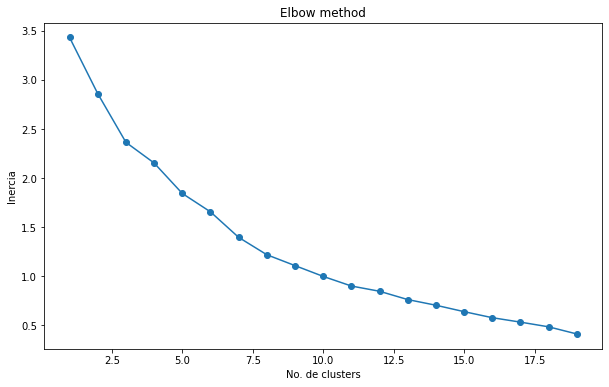

In [129]:
import matplotlib.pyplot as plt

inercia = []
for i in range(1, 20):
    algoritmo = KMeans(n_clusters= i, init = 'k-means++',
                     max_iter = 300, n_init = 10)
    algoritmo.fit(toronto_grouped_clustering)
    #for each K, we calculate the total sum of square inside cluster
    inercia.append(algoritmo.inertia_)
    
# We plot the curve of te sume of the square errors
plt.figure(figsize=[10,6])
plt.title('Elbow method')
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1,20)), inercia, marker='o')
plt.show

### We can see that 6 is the number that could be the best selection

In [130]:
# set number of clusters
kclusters2 = 6

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans2 = KMeans(n_clusters=kclusters2, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans2.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

### We append a new column with the new clusters

In [131]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels 2', kmeans2.labels_)

toronto_merged = df_Toronto

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head(39) # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels 2,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,0,Coffee Shop,Pub,Bakery,Park,Breakfast Spot,Café,Theater,Gym / Fitness Center,French Restaurant,Restaurant
1,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,0,Coffee Shop,Clothing Store,Café,Middle Eastern Restaurant,Bubble Tea Shop,Cosmetics Shop,Fast Food Restaurant,Lingerie Store,Bookstore,Ramen Restaurant
2,Downtown Toronto,St. James Town,43.651494,-79.375418,0,0,Coffee Shop,Café,Cosmetics Shop,Cocktail Bar,Park,Beer Bar,Hotel,Creperie,Restaurant,Gym
3,East Toronto,The Beaches,43.676357,-79.293031,2,2,Pub,Health Food Store,Trail,Wings Joint,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant
4,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,0,Coffee Shop,Cocktail Bar,Bakery,Beer Bar,Restaurant,Farmers Market,Seafood Restaurant,Pharmacy,Cheese Shop,Belgian Restaurant
5,Downtown Toronto,Central Bay Street,43.657952,-79.387383,0,0,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Burger Joint,Thai Restaurant,Salad Place,Bubble Tea Shop,Pizza Place,Park
6,Downtown Toronto,Christie,43.669542,-79.422564,0,0,Grocery Store,Café,Park,Nightclub,Coffee Shop,Restaurant,Baby Store,Athletics & Sports,Italian Restaurant,Candy Store
7,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,0,0,Coffee Shop,Café,Restaurant,Gym,Deli / Bodega,Clothing Store,Thai Restaurant,Burrito Place,Pizza Place,Cosmetics Shop
8,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259,0,0,Bakery,Pharmacy,Park,Bar,Supermarket,Café,Music Venue,Middle Eastern Restaurant,Portuguese Restaurant,Bank
9,East York/East Toronto,The Danforth East,43.685347,-79.338106,5,0,Convenience Store,Park,Intersection,Wings Joint,Diner,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant


### Creating a new map with the new 6 clusters

In [132]:
# create map
map_clusters = folium.Map(location=[latitude_T, longitude_T], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters2)
ys = [i + x + (i*x)**2 for i in range(kclusters2)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels 2']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters